# Домашняя работа

## Урок 2. 

### Задание начального уровня


Примените процедуру токенизации к файлу `brand_tweets_valid.csv`

Сколько *уникальных* токенов получилось?

In [1]:
# стоп-слова
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'shold',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
]

In [4]:
import nltk
import string
import pandas as pd
from itertools import chain
import numpy as np
# дополнительный словарь со знаками пунктуации
nltk.download('punkt', download_dir='.')

### YOUR CODE HERE ###
df = pd.read_csv("./data/brand_tweets_valid.csv")
tweets = df["tweet_text"].values

tweets[:5]

[nltk_data] Downloading package punkt to ....
[nltk_data]   Package punkt is already up-to-date!


array(['Wow! Google maps for mobile v5 demo at #sxsw. Very nice.',
       'The #google name was built on gettinng stuff out there and trying it with users to see what works. #marissagoogle #sxsw',
       '&quot;Apple opening a temporary store in Austin for SXSW and the iPad 2 launch:&quot; {link} #SXSW',
       '#tech Apple Opening Pop-Up Store In Austin For #SXSW {link}',
       'GSDM Google party is off the hook! #SXSW  {link}'], dtype=object)

In [6]:
#Количество уникальных токенов
X = [nltk.tokenize.word_tokenize(t) for t in tweets]
X_ = [[t for t in tweet if t not in stop_words] for tweet in X]

unique = set()
for tweet in X_:
    for t in tweet:
       unique.add(t)

print(len(unique))

2097


## Урок 3 

### Задание начального уровня

Потренируйтесь в нахождении матрицы схожести для валидационного сета

* загрузите `brand_tweets_valid.csv`
* примените объект `vectorizer`, обученный на датасете `brand_tweets.csv` (просто скопируйте этот код из урока)
* примените функцию `pairwise_distances` к полученной матрице

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

df_valid = pd.read_csv('./data/brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df_valid.drop(df[df.tweet_text.isnull()].index, inplace=True)

### YOUR CODE HERE ###
vectorizer = CountVectorizer(tokenizer=nltk.tokenize.word_tokenize)  #tokenize_text не определен и в уроке!!!

document_matrix = vectorizer.fit_transform(df.tweet_text.values)
# результат - матрица, в которой находятся числа, строк в мастрице столько, сколько документов
# а столбцов столько, сколько токенов
document_matrix

<402x1900 sparse matrix of type '<class 'numpy.int64'>'
	with 8753 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.metrics import pairwise_distances

tweet_distance = 1-pairwise_distances(document_matrix, metric="cosine")

tweet_distance.shape

(402, 402)

In [12]:
len(df_valid)

402

### Задание среднего уровня

Пользуясь матрицей схожести, полученной на предыдущем этапе, найдите top-5 твитов, похожих на твит валидационного сета с `id=14`.

In [20]:
test_tweet_index = 14
print(df_valid.iloc[test_tweet_index].tweet_text+'\n------------------------------\n')

### YOUR CODE HERE ###
t_d = np.copy(tweet_distance)

similars = []
for i in range(6):
  a = t_d[test_tweet_index, :].squeeze()
  _max = np.argmax(a)
  similars.append(_max)
  t_d = np.hstack([t_d[:,:_max], t_d[:,_max+1:]])

print(similars)
for i in similars[1:]:
   print(df_valid.iloc[i].tweet_text)
  

Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW
------------------------------

[14, 131, 277, 15, 337, 14]
Apple employee psyches up line at pop up shop at #SXSW moments before iPad 2 goes on sale!  {link}
Do the Humpty hump!  Google ACLU Party like its 1986! #SXSW
Popup Apple Store opens up for #SXSW. Love that this is going to be right in the middle of the action. {link} via @mention
this woman is great - fessing up to issues, admitting google could do better #sxsw
Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW


### Задание высокого уровня.

У вас есть матрица схожести между объектами. Попробуйте решить задачу поиска дубликатов в тексте

1. Визуализируйте гистограмму значений в матрице схожести.
1. Напишите функцию на Python, которая принимает индекс твита, пороговое значение (число от $0.0$ до $1.0$ и матрицу схожести, а затем выводит все твиты, схожесть которых больше, чем пороговое значение.


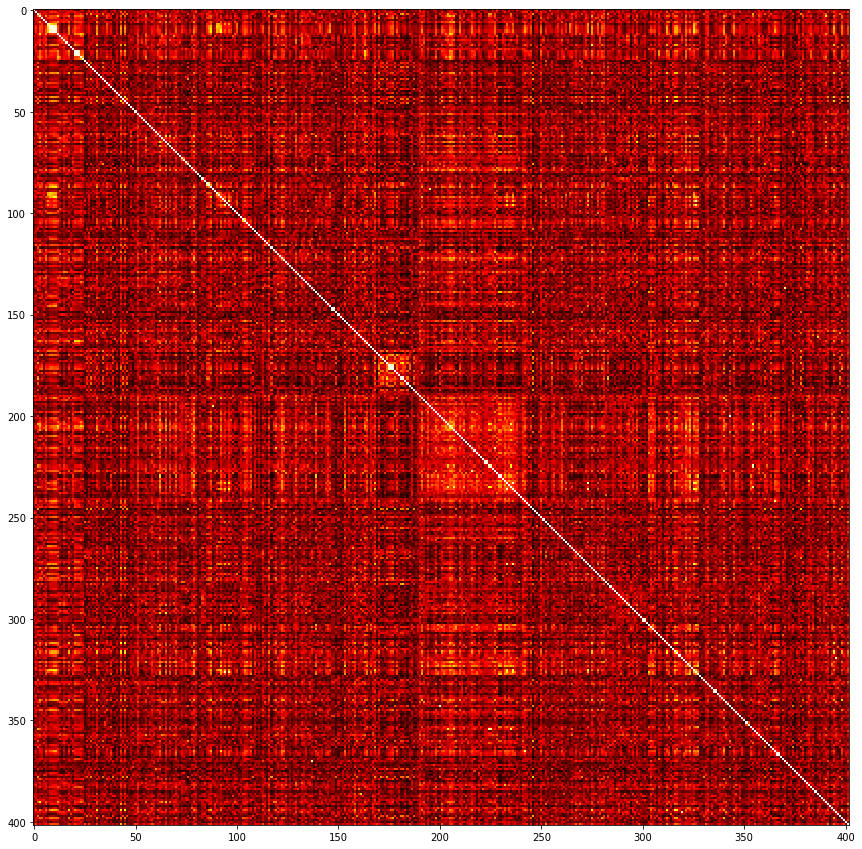

In [34]:
### YOUR CODE HERE ###
from matplotlib import pyplot as plt
%matplotlib inline

### YOUR CODE HERE ###
plt.figure(figsize=(15,15))
plt.imshow(tweet_distance, cmap='hot', interpolation='nearest')
plt.show()

In [39]:
def more_similar(tweet_index, threshold, t_d):
    print(df_valid.iloc[tweet_index].tweet_text+'\n------------------------------')
    a = t_d[tweet_index, :].squeeze()
    indices = np.argwhere(a > threshold).squeeze()
    print(indices)
    print("More similar than ", threshold, ":")
    for i in indices:
        if i == tweet_index: continue
        print("Tweet #", i, ": ", df_valid.iloc[i].tweet_text)

more_similar(14, 0.5, tweet_distance)

Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW
------------------------------
[ 14 132]
More similar than  0.5 :
Tweet # 132 :  Apple employees just showed up in force to the #SXSW PopUp Apple Store. #iPad2


## Урок 4.

### Задание начального уровня

Обучите модель Skip-Gram (передав параметр `sg=1`. Какие top-10 слов больше всего похожи на слово `iphone` ?

In [41]:
df_valid = pd.read_csv('./data/brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df_valid.drop(df[df.tweet_text.isnull()].index, inplace=True)

df_valid["tokenized"] = df_valid["tweet_text"].apply(lambda x: nltk.word_tokenize(x))

from gensim.models import Word2Vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

texts = df_valid["tokenized"].values

model = Word2Vec(texts, size=10, window=7, min_count=2, workers=4, iter=10, sg=1)

2020-11-16 15:22:53,436 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2020-11-16 15:22:53,437 : INFO : collecting all words and their counts
2020-11-16 15:22:53,443 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-11-16 15:22:53,445 : INFO : collected 2202 word types from a corpus of 9827 raw words and 402 sentences
2020-11-16 15:22:53,450 : INFO : Loading a fresh vocabulary
2020-11-16 15:22:53,453 : INFO : effective_min_count=2 retains 739 unique words (33% of original 2202, drops 1463)
2020-11-16 15:22:53,457 : INFO : effective_min_count=2 leaves 8364 word corpus (85% of original 9827, drops 1463)
2020-11-16 15:22:53,460 : INFO : deleting the raw counts dictionary of 2202 items
2020-11-16 15:22:53,462 : INFO : sample=0.001 downsamples 55 most-common words
2020-11-16 15:22:53,464 : INFO : downsampling leaves estimated 4798 word corpus (57.4% of prior 8364)
2020-11-16 15:22:53,468 : INFO : estimated required memory for

In [42]:
model.wv.most_similar('iphone')

2020-11-16 15:23:15,902 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('shot', 0.998603343963623),
 ('used', 0.9979947209358215),
 ('its', 0.9979667663574219),
 ('website', 0.9979499578475952),
 ('sxflip', 0.997708797454834),
 ('ACLU', 0.9976962804794312),
 ('Can', 0.997603178024292),
 ('Share', 0.9974924921989441),
 ('But', 0.9974232316017151),
 ('Most', 0.9972898364067078)]